# Гипотезы, А/В тесты.

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.  
  
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Часть 1. Приоритизация гипотез.

В файле */datasets/hypothesis.csv* 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами *Reach*, *Impact*, *Confidence*, *Effort*.

### Знакомство с данными. Предобработка данных.

**Файл** /datasets/hypothesis.csv.  
- *Hypothesis* — краткое описание гипотезы;  
- *Reach* — охват пользователей по 10-балльной шкале;  
- *Impact* — влияние на пользователей по 10-балльной шкале;  
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;  
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение *Efforts*, тем дороже проверка гипотезы.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial
from math import sqrt
from copy import deepcopy
import seaborn as sns
from datetime import datetime, timedelta
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
import warnings
import datetime as dt

In [2]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [3]:
# Загружаем таблицу
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    
    hypothesis.to_csv('hypothesis.csv', index = False)

In [4]:
pd.options.display.max_colwidth = 150
hypothesis 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Названия столбцов нужно привести к нижнему регистру.

In [5]:
hypothesis.columns = hypothesis.columns.str.lower()

In [6]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Проверим типы данных.

In [7]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


Типы данных в соответствии с нужными.

### Задача 1

Примените фреймворк *ICE* для приоритизации гипотез.  
  
Отсортируйте их по убыванию приоритета.

In [8]:
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts'], 2) 
hypothesis['ICE'] = hypothesis['ICE']
hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


По показаниям *ICE* приоритетные гипотезы № 8; 0; 7. 

### Задача 2

Примените фреймворк *RICE* для приоритизации гипотез.  
  
Отсортируйте их по убыванию приоритета.

In [9]:
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['RICE'] = hypothesis['RICE']
hypothesis[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По показаниям *RICE* приоритетные гипотезы № 7; 2; 0; 6.

### Задача 3

Укажите, как изменилась приоритизация гипотез при применении *RICE* вместо *ICE*.  
  
Объясните, почему так произошло.

По фреймворку *ICE* наибольшую оценку имели гпиотезы № 8,0 и 7.  
После применения фреймворка *RICE* приоритеты изменились на гпиотезы № 7,2 и 0.  
Это объясняется тем, что в при использовании фреймворка *ICE* в отличие от *RICЕ* мы не учитываем охват изменений, тогда как это важная составляющая оценки гипотез.

В нашем случае наиболее приоритетными гипотезами будут № 7, 2, 0.

## Часть 2. Анализ A/B-теста

### Знакомство с данными. Предобработка данных.

**Файл** /datasets/orders.csv. 
- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.
  
**Файл** /datasets/visitors.csv.
- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

In [10]:
# Загружаем таблицы
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [11]:
display(orders.sample(5))
visitors.sample(5)

,transactionId,visitorId,date,revenue,group
1080,3498400794,3419266314,2019-08-12,8090,B
967,1126236755,4228915420,2019-08-10,2348,B
355,562977028,233773277,2019-08-24,6536,B
179,1784270968,2378935119,2019-08-17,310,A
613,4071177889,3931967268,2019-08-07,53904,B


,date,group,visitors
38,2019-08-08,B,654
59,2019-08-29,B,531
32,2019-08-02,B,581
16,2019-08-17,A,412
9,2019-08-10,A,406


Названия столбцов *transactionId*, *visitorId* в таблице *orders* нужно привести к надлежащему виду.

In [12]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

In [13]:
orders.sample(5)

,transaction_id,visitor_id,date,revenue,group
762,3047372556,171459513,2019-08-07,5690,B
1055,1880179202,2463259495,2019-08-11,350,B
38,3276214732,1110007955,2019-08-15,19260,B
916,527333943,2458001652,2019-08-08,5227,B
236,3422531330,2230225652,2019-08-23,660,B


Посмотрим общую информацию.

In [14]:
display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   transaction_id  1197 non-null   int64 
 1   visitor_id      1197 non-null   int64 
 2   date            1197 non-null   object
 3   revenue         1197 non-null   int64 
 4   group           1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обеих таблицах столбцы *date* нужно привести к типу *datetime*.

In [15]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

display(orders.info())
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проверим пропуски.

In [16]:
orders.isna().sum()

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64

In [17]:
visitors.isna().sum()

date        0
group       0
visitors    0
dtype: int64

Пропуски отсуествуют.

Проверим наличие дубликатов.

In [18]:
orders.duplicated().sum()

0

In [19]:
visitors.duplicated().sum()

0

Сделали предобработку данных.
- Зменили типы данных.
- Привели имена столбцов к единому стилю.
- Обработали дубликаты.
- Обработали пропуски.

### Данные по группам

Посмотрим количество групп в тесте.

In [20]:
orders['group'].nunique()

2

In [21]:
visitors['group'].nunique()

2

Колличество групп 2, значит тест у нас парный.

Посмотрим даты начала и окончания теста.

In [22]:
orders['date'].min()

Timestamp('2019-08-01 00:00:00')

In [23]:
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [24]:
orders['date'].max()

Timestamp('2019-08-31 00:00:00')

In [25]:
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

Дата начала теста 2019-08-01, окончания 2019-08-31.  
Временной интервал проведения теста Август 2019 года.

Посмотрим сколько уникальных пользователей в каждой группе. (таблица *orders*)

In [26]:
# Количество пользователей в группах
orders.groupby(['group'])['group'].count()

group
A    557
B    640
Name: group, dtype: int64

In [27]:
# Общее количество пользователей в группах
orders.groupby(['group'])['group'].count().sum()

1197

In [28]:
# Общее количество уникальных пользователей
orders['visitor_id'].nunique()

1031

Общее количество пользователей в группах - 1197, а уникальных пользователей - 1031.  
Значит есть пользователи которые участвуют в обеих группах.

In [29]:
# Отбираем группы из данных с заказами 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"')

# Получаем id пользователей, попавших в обе группы 
group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

58

58 записей пользователей попали в обе группы.  
Это может исказить дальнейшие выводы, поэтому записи о покупках этих пользователей придется удалить.

In [30]:
# Удаляем записи
orders = orders.query('visitor_id not in @group_intersections')

In [31]:
# Проверяем 
group_a=orders.query('group == "A"') 
group_b=orders.query('group == "B"')

group_intersections=list(np.intersect1d(group_a['visitor_id'], group_b['visitor_id']))
len(group_intersections)

0

In [32]:
# Количество пользователей в группах
orders.groupby(['group'])['group'].count()

group
A    468
B    548
Name: group, dtype: int64

In [33]:
# Общее количество пользователей в группах
orders.groupby(['group'])['group'].count().sum()

1016

Получается что 15 пользователей попали в обе группы и сделали 58 заказов.

### Задача 1

Постройте график кумулятивной выручки по группам.   
  
Сделайте выводы и предположения.

Чтобы построить графики, нужно собрать кумулятивные данные.  
  
Объявим датафрейм *cumulativeData* со столбцами:   
*date* — дата;  
*group* — группа A/B-теста (A или B);  
*orders* — кумулятивное количество заказов на указанную дату в указанной группе;  
*buyers* — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;  
*revenue* — кумулятивная выручка на указанную дату в указанной группе (средний чек);  
*visitors* — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [34]:
# Создадим массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# Соберём агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# Объединим обе таблицы в одну с понятными названиями столбцов
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.sample(5)

,date,group,orders,buyers,revenue,visitors
40,2019-08-21,A,329,311,2273782,12850
39,2019-08-20,B,368,360,3768059,12218
17,2019-08-09,B,176,173,1162961,5908
9,2019-08-05,B,89,87,475648,3280
50,2019-08-26,A,396,378,2755121,15665


Построим график выручки по группам.

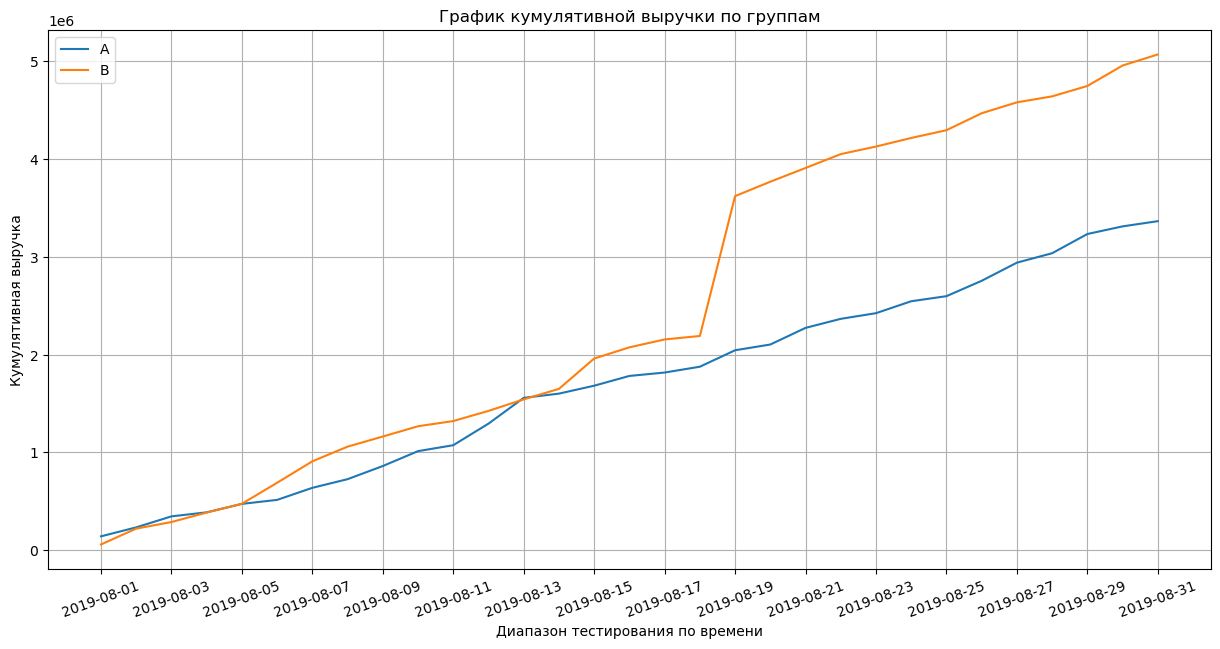

In [35]:
cumulativeA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]
cumulativeB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders', 'visitors']]
    
plt.figure(figsize=(15, 7))

plt.plot(cumulativeA['date'], cumulativeA['revenue'], label='A')
plt.plot(cumulativeB['date'], cumulativeB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel('Кумулятивная выручка')

plt.xlabel('Диапазон тестирования по времени')
plt.xticks(np.arange(min(cumulativeData['date']), max(cumulativeData['date']) + timedelta(days=1), timedelta(days=2)))
plt.legend()
plt.xticks(rotation=20)
plt.grid()
plt.show()

**Вывод**:  
  
Выручка почти равномерно увеличивается в течение всего теста.  
Однако у графика группы *В* есть очень резкий рост.  
Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Задача 2

Постройте график кумулятивного среднего чека по группам.  
  
Сделайте выводы и предположения.

Построим график среднего чека по группам.

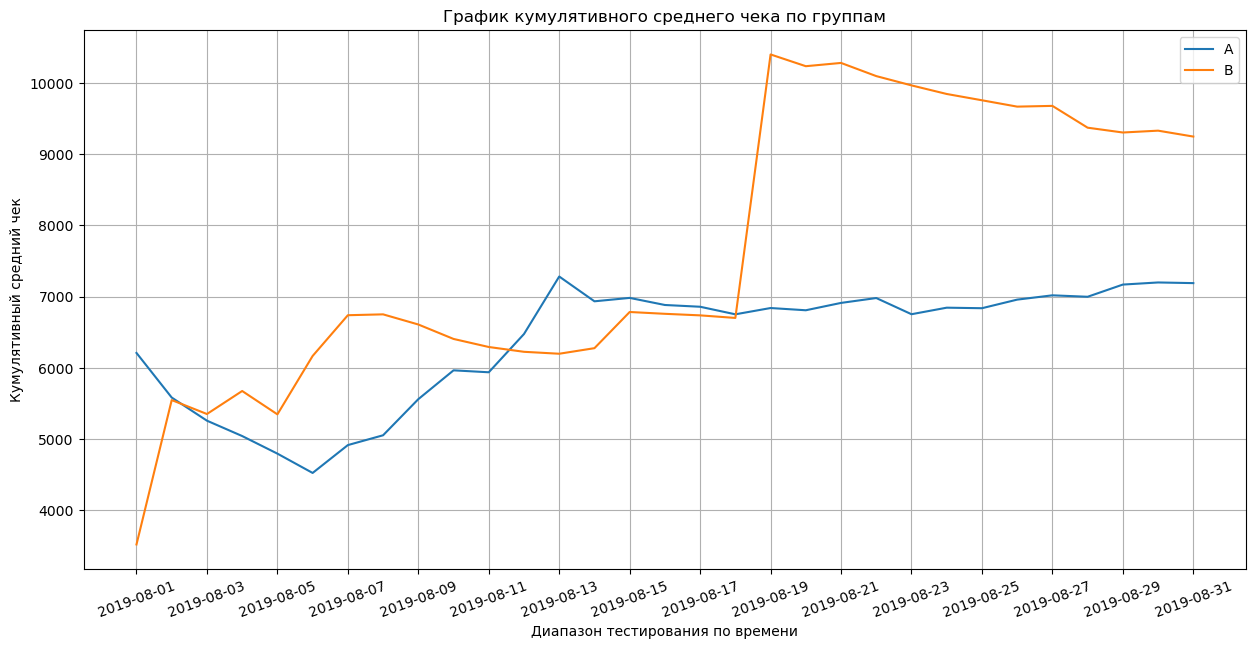

In [36]:
cumulativeRevenueA_mean_bill = cumulativeA['revenue'] / cumulativeA['orders']
cumulativeRevenueB_mean_bill = cumulativeB['revenue'] / cumulativeB['orders']
    
plt.figure(figsize=(15, 7))

plt.plot(cumulativeA['date'], cumulativeRevenueA_mean_bill, label='A')
plt.plot(cumulativeB['date'], cumulativeRevenueB_mean_bill, label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Кумулятивный средний чек')

plt.xlabel('Диапазон тестирования по времени')
plt.xticks(np.arange(min(cumulativeData['date']), max(cumulativeData['date']) + timedelta(days=1), timedelta(days=2)))
plt.legend()
plt.xticks(rotation=20)
plt.grid()
plt.show()

**Вывод**:  
  
Средний чек вырос неравномерно.

Для группы *А* заметно падение с последующим ростом. Половину периода накопление среднего чека не росло.

Для группы *В* первая половина периода прошла неравномерным ростом, а во второй половине произошел резкий всплеск. Это может говорить о попадании очень крупного заказа. Затем средний чек падает.

Накопление среднего чека в обеих группах неравномерное. Необходимо больше данных для того, чтобы график среднего чека установился на определенном уровне.

### Задача 3

Постройте график относительного изменения кумулятивного среднего чека группы *B* к группе *A*.  
  
Сделайте выводы и предположения.

Построим график изменения среднего чека группы *В* к группе *А*.

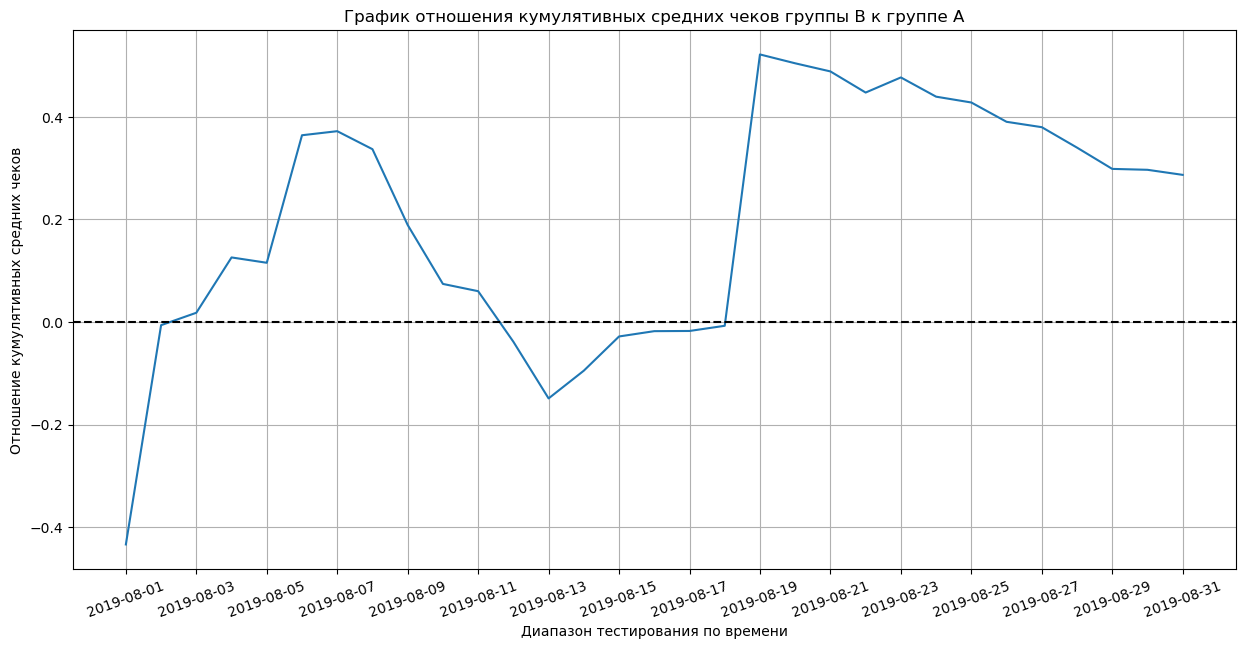

In [37]:
def to_calculate_relative_metrics(df, column):
    result = (df[column[0]] / df[column[1]]) / (df[column[2]] / df[column[3]]) - 1
    return result
    
mergedCumulativeRevenue = cumulativeA.merge(cumulativeB, on='date', suffixes=['A', 'B'])
сumulativeRevenue = to_calculate_relative_metrics(mergedCumulativeRevenue, ['revenueB', 'ordersB', 'revenueA', 'ordersA'])

plt.figure(figsize=(15, 7))

plt.plot(mergedCumulativeRevenue['date'], сumulativeRevenue)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График отношения кумулятивных средних чеков группы В к группе А')
plt.ylabel('Отношение кумулятивных средних чеков')

plt.xlabel('Диапазон тестирования по времени')
plt.xticks(np.arange(min(cumulativeData['date']), max(cumulativeData['date']) + timedelta(days=1), timedelta(days=2)))
plt.xticks(rotation=20)
plt.grid()
plt.show()

**Вывод**:

Изменение кумулятивного среднего чека относительно группы *В* к группе *А* резко скачет.  
Большие различия по заказам между группами - есть аномалии и крупные заказы.  
Их надо будет учесть в далнейшей работе.

### Задача 4

Постройте график кумулятивного среднего количества заказов на посетителя по группам.  
  
Сделайте выводы и предположения.

Построим график среднего количества заказов на посетителя по группам.

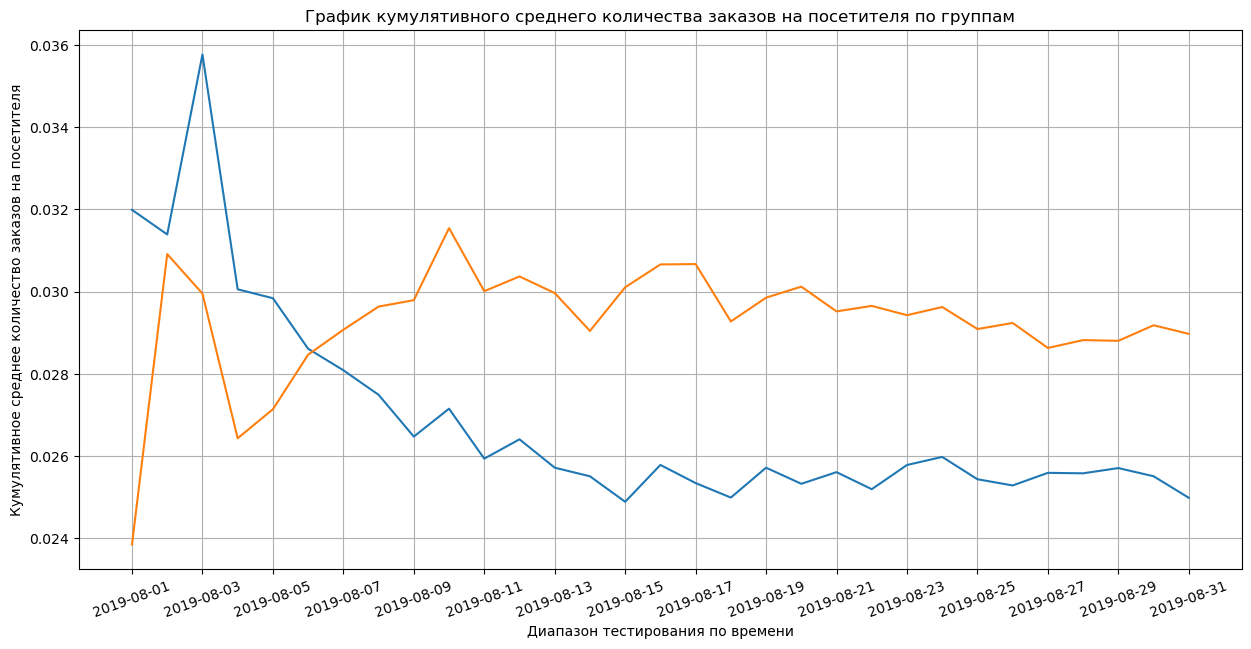

In [38]:
cumulativeOrdersA_mean_count = cumulativeA['orders'] / cumulativeA['visitors']
cumulativeOrdersB_mean_count = cumulativeB['orders'] / cumulativeB['visitors']

plt.figure(figsize=(15, 7))

plt.plot(cumulativeA['date'], cumulativeOrdersA_mean_count, label='A')
plt.plot(cumulativeB['date'], cumulativeOrdersB_mean_count, label='B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')

plt.xlabel('Диапазон тестирования по времени')
plt.xticks(np.arange(min(cumulativeData['date']), max(cumulativeData['date']) + timedelta(days=1), timedelta(days=2)))
plt.xticks(rotation=20)
plt.grid()
plt.show()

**Вывод**:  
  
График для группы *А* в начале делает скачёк, а затем резко падает и успакаивается на плато.  
  
На графике для группы *В* видны резкие колебания в первую неделю, но затем происходит стабилизация. При этом в группе *В* стабильно выше метрика относительно группы *А*.  
  
Как видно всё - таки проблема в аномалиях.

### Задача 5

Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы *B* к группе *A*.  
  
Сделайте выводы и предположения.

Построим график изменения среднего количества заказов на посетителя группы *В* к группе *А*.

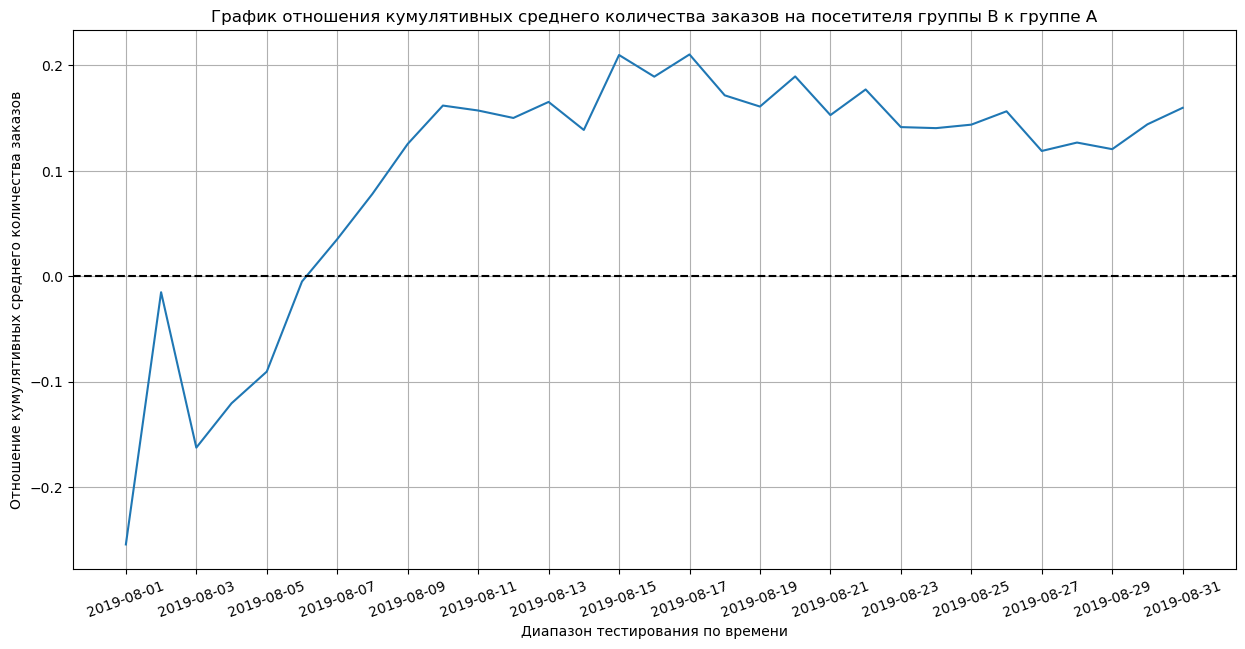

In [39]:
mergedCumulativeOrders = cumulativeA.merge(cumulativeB, on='date', suffixes=['A', 'B'])
сumulativeOrders = to_calculate_relative_metrics(mergedCumulativeOrders, ['ordersB', 'visitorsB', 'ordersA', 'visitorsA'])
    
plt.figure(figsize=(15, 7))

plt.plot(mergedCumulativeOrders['date'], сumulativeOrders)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График отношения кумулятивных среднего количества заказов на посетителя группы В к группе А')
plt.ylabel('Отношение кумулятивных среднего количества заказов')
        
plt.xlabel('Диапазон тестирования по времени')
plt.xticks(np.arange(min(cumulativeData['date']), max(cumulativeData['date']) + timedelta(days=1), timedelta(days=2)))
plt.xticks(rotation=20)
plt.grid()
plt.show()

**Вывод**  
  
Изменение среднего количества заказов на посетителя группы *В* к группе *А* неравномерно растет, заметен высокий рост в первую неделю.

Метрика лучше в группе *В* практически на всем рассматриваемом периоде, кроме первых 6 дней. К концу периода заметно снижение роста.

### Задача 6

Постройте точечный график количества заказов по пользователям.  
  
Сделайте выводы и предположения.

Построим график количества заказов по пользователям.

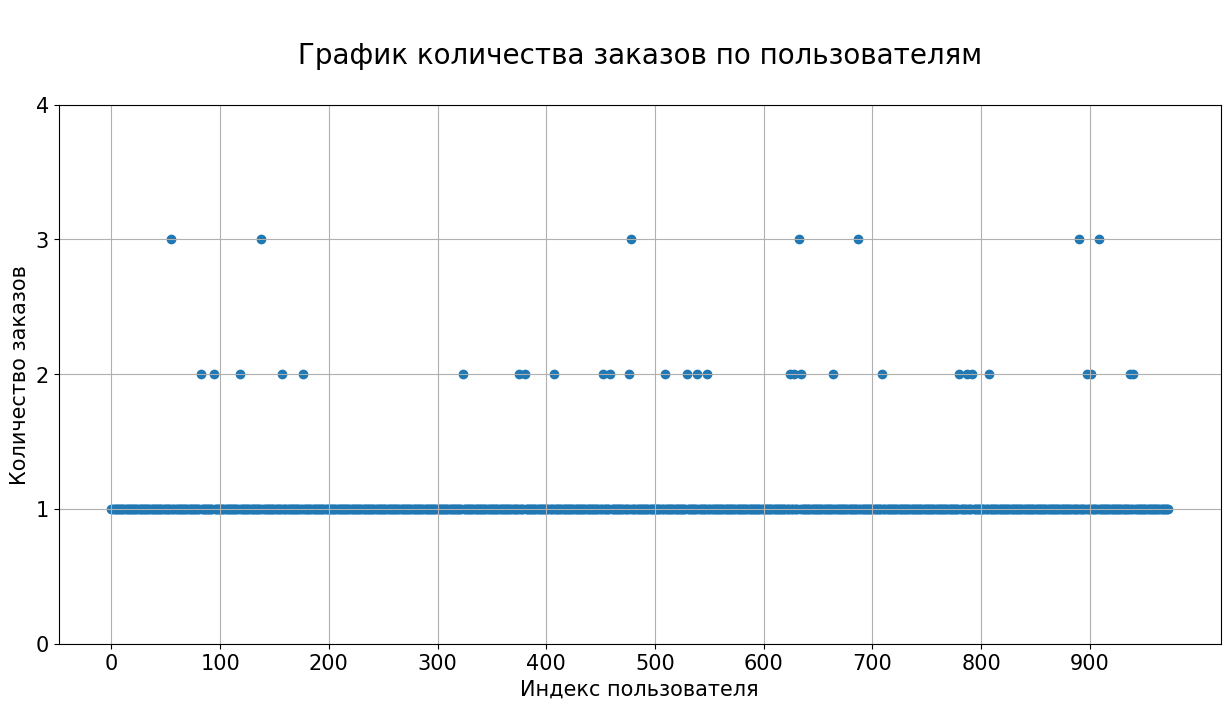

In [40]:
orders_agg = (orders.groupby(by=['visitor_id']).agg({'transaction_id': 'count'}).rename(columns={'transaction_id': 'orders_cnt'}).reset_index())

plt.figure(figsize=(15, 7))

x_values = pd.Series(range(0, len(orders_agg['orders_cnt'])))
plt.scatter(x_values, orders_agg['orders_cnt'])

plt.title('\n График количества заказов по пользователям \n', fontsize=20)
plt.ylabel('Количество заказов', fontsize=15)
plt.xlabel('Индекс пользователя', fontsize=15)

plt.xticks(np.arange(min(x_values), max(x_values), 100))
plt.xticks(fontsize=15)
plt.yticks(np.arange(min(orders_agg['orders_cnt']) - 1, max(orders_agg['orders_cnt']) + 2, 1))
plt.yticks(fontsize=15)
plt.grid()
plt.show()

**Вывод**:  
  
Будем считать что 3 заказа это аномалия.  
Граница отсечения по количеству заказов на графике должна располагаться на уровне не больше 2 заказов.

### Задача 7

Посчитайте 95-й и 99-й перцентили количества заказов на пользователя.  
  
Выберите границу для определения аномальных пользователей.

In [41]:
np.percentile(orders_agg['orders_cnt'], [95, 99])

array([1., 2.])

Граница для определения аномальных пользователей будет не больше 2 заказов.

### Задача 8

Постройте точечный график стоимостей заказов.  
   
Сделайте выводы и предположения.

Построим график стоимости заказов.

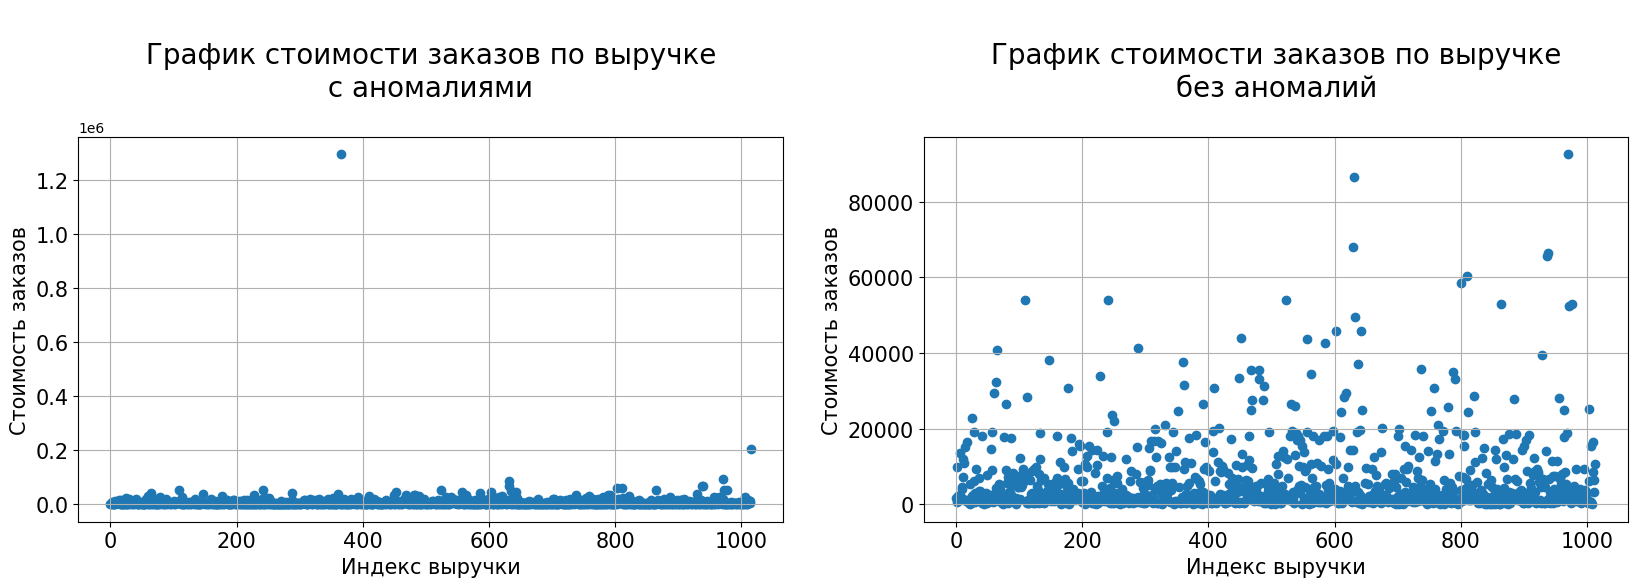

In [42]:
fig = plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)

x_values = pd.Series(range(0, len(orders['revenue'])))
ax1.scatter(x_values, orders['revenue'])

plt.title('\n График стоимости заказов по выручке \n c аномалиями \n', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Индекс выручки', fontsize=15)

plt.xticks(np.arange(min(x_values), max(x_values), 200))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()

ax2 = plt.subplot(1, 2, 2, sharex=ax1)

y_values = orders[orders['revenue'] < 200000]['revenue']
x_values = pd.Series(range(0, len(y_values)))

ax2.scatter(x_values, y_values)

plt.title('\n График стоимости заказов по выручке \n без аномалий \n', fontsize=20)
plt.ylabel('Стоимость заказов', fontsize=15)
plt.xlabel('Индекс выручки', fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

Граница отсечения должна быть меньше 200 000.  
В расчете выручки есть экстремально аномальное значение оно видимо и создавало скачок метрик в группе *В*.

### Задача 9

Посчитайте 95-й и 99-й перцентили стоимости заказов.  
  
Выберите границу для определения аномальных заказов.

In [43]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Границу для определения стоимости аномальных заказов определяем не более 26785.

### Задача 10

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.  
  
Сделайте выводы и предположения.

Нулевая гипотеза: различие в среднем количестве заказов на посетителя между группами по "сырым" данным статистически не значимы.   
Альтернативная гипотеза: различие в среднем количестве заказов на посетителя между группами по "сырым" данным статистически  значимы.

Применим тест U-критерий Манна — Уитни.  
Уровень статистической значимости α = 0.05

In [44]:
# Создадим функцию для расчётов
def statistical_significance(sampleA, sampleB, alpha=0.05):
    
    p_value = float("{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
    
    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница. p_value={}'.format(p_value))
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value={}'.format(p_value))
        
    p_value = float("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))
    
    if p_value < alpha:
        print('Относительный прирост группы В к группе А < уровня значимости. p_value={}'.format(p_value))
    else:
        print('Относительный прирост группы В к группе А >= уровня значимости. p_value={}'.format(p_value))

In [45]:
def orders_by_users(orders):
    ordersByUsersA = (
        orders[orders['group'] == 'A']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    ordersByUsersA.columns = ['visitor_id', 'orders']

    ordersByUsersB = (
        orders[orders['group'] == 'B']
        .groupby('visitor_id', as_index=False)
        .agg({'transaction_id': pd.Series.nunique})
    )
    ordersByUsersB.columns = ['visitor_id', 'orders']
    return ordersByUsersA, ordersByUsersB

In [46]:
ordersByUsersA, ordersByUsersB = orders_by_users(orders)

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0,index = np.arange(cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0,index = np.arange(cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

statistical_significance(sampleA, sampleB)

Отвергаем нулевую гипотезу: между долями есть значимая разница. p_value=0.011
Относительный прирост группы В к группе А >= уровня значимости. p_value=0.16


*p_value*=1.1%, это меньше заданного уровня значимости.  
Нулевую гипотезу отвергаем.  
Разница между выборками имеет весомый результат.  
Можно утверждать, что разница в среднем количестве заказов на посетителя между группами есть.

Относительный прирост группы *В* по среднему количеству заказов на посетителя 16%.

### Задача 11

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.  
  
Сделайте выводы и предположения.

Нулевая гипотеза: разница в среднем чеке заказа между группами по "сырым" данным статистически не значима.  
  
Альтернативная гипотеза: разница в среднем чеке заказа между группами по "сырым" данным статистически значима.

Уровень статистической значимости α = 0.05

In [47]:
sampleA = orders[orders['group']=='A']['revenue']
sampleB = orders[orders['group']=='B']['revenue']

statistical_significance(sampleA, sampleB)

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value=0.829
Относительный прирост группы В к группе А >= уровня значимости. p_value=0.287


Нулевую гипотезу не отвергаем.  
Разница между выборками статистически не значима.

Относительный прирост группы *В* по среднему чеку заказа 28,7%.

### Задача 12

Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.  
  
Сделайте выводы и предположения.

Посчитаем аномальных пользователей сделавших от 2 заказов или заказ дороже 26785 рублей. Так мы уберём пользователей с наибольшим числом заказов и пользователей с дорогими заказами.

In [48]:
# Сделаем срез
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],],axis=0,)

usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitor_id']

abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

display(abnormalUsers.head())
abnormalUsers.shape[0]

568     113298937
1099    148427295
928     204675465
684     358944393
648     382846391
Name: visitor_id, dtype: int64

56

Всего 56 аномальных пользователя.

Посмотрим отнасительные потери из - за аномальных пользователей.

In [49]:
anomal_user = round(((abnormalUsers.count() / orders['visitor_id'].nunique()) * 100), 2)
print('Относительные потери из - за аномальных пользователей составили {}'.format(anomal_user),'%')

Относительные потери из - за аномальных пользователей составили 5.76 %


Нулевая гипотеза: разница в среднем количестве заказов на посетителя между группами по "сырым" данным статистически не значима. Альтернативная гипотеза: разница в среднем количестве заказов на посетителя между группами по "сырым" данным статистически значима.

Уровень статистической значимости α = 0.05

In [50]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(cumulativeData[cumulativeData['group'] == 'A']['visitors'].max() - len(ordersByUsersA['orders'])),name='orders',),],axis=0,)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))]['orders'],pd.Series(0,index=np.arange(cumulativeData[cumulativeData['group'] == 'B']['visitors'].max() - len(ordersByUsersB['orders'])),name='orders',),],axis=0,)

statistical_significance(sampleAFiltered, sampleBFiltered)

Отвергаем нулевую гипотезу: между долями есть значимая разница. p_value=0.01
Относительный прирост группы В к группе А >= уровня значимости. p_value=0.196


Аномалии не особо повлияли на статистическую значимость, так как по очищенным данным *p_value* уменьшился с 1.1%% до 1%.

Относительный прирост группы *В* к группе *А* увеличился с 16% до 19.6%.

### Задача 13

Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.  
  
Сделайте выводы и предположения.

Нулевая гипотеза: разница в среднем чеке заказа между группами по "очищенным" данным статистически не значима.

Альтернативная гипотеза: разница в среднем чеке заказа между группами по "очищенным" данным статистически значима.

Уровень статистической значимости α = 0.05

In [51]:
sampleAFiltered = orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers)) & (orders['group'] == 'A')]['revenue']

sampleBFiltered = orders[np.logical_not(orders['visitor_id'].isin(abnormalUsers)) & (orders['group'] == 'B')]['revenue']

statistical_significance(sampleAFiltered, sampleBFiltered)

Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными. p_value=0.698
Относительный прирост группы В к группе А < уровня значимости. p_value=-0.041


Нулевую гипотезу не отвергаем.  

Разница между выборками статистически не значима.  
*p_value* уменьшился с 82.9% до 69.8%.

Относительный прирост группы В по среднему чеку заказа уменьшился с 28.7% до 4.1%.

### Задача 14

Примите решение по результатам теста и объясните его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Данные исследования:  
- Выручка почти равномерно увеличивается в течение всего теста. Однако у графика группы *В* есть очень резкий рост. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.  
  
- Средний чек вырос неравномерно.Для группы *А* заметно падение с последующим ростом. Половину периода накопление среднего чека не росло.Для группы *В* первая половина периода прошла неравномерным ростом, а во второй половине произошел резкий всплеск. Это может говорить о попадании очень крупного заказа. Затем средний чек падает.Накопление среднего чека в обеих группах неравномерное. Необходимо больше данных для того, чтобы график среднего чека установился на определенном уровне.  
  
- Изменение кумулятивного среднего чека относительно группы *В* к группе *А* резко скачет. Большие различия по заказам между группами - есть аномалии и крупные заказы. Их надо будет учесть в далнейшей работе.  

- График для группы *А* резко падает и успакаивается на плато. На графике для группы В видны резкие колебания в первую неделю, но затем происходит стабилизация. При этом в группе *В* стабильно выше метрика относительно группы *А*. Есть резкие всплески в первую неделю, как видно всё - таки проблема в аномалиях.
  

- Изменение среднего количества заказов на посетителя группы *В* к группе *А* неравномерно растет, заметен высокий рост в первую неделю. Метрика лучше в группе *В* практически на всем рассматриваемом периоде, кроме первых 6 дней. К концу периода заметно снижение роста.  
  
- Статистической разницы между "очищенными" и "сырыми" данными нет. *p_value* уменьшился с 82.9% до 69.8%.
- Относительный прирост группы *В* по среднему чеку заказа уменьшился с 28.7% до 4.1%%.
- Аномалии особо не повлияли на статистическую значимость. По очищенным данным *p_value* уменьшился с 1.1% до 1%.
- Относительный прирост группы *В* к группе *А* увеличился с 16% до 19.6%.  

**Вывод**:  
  
График различия среднего количества заказов между группами сообщает, что результаты группы *B* лучше группы *A*.  

График различия среднего чека говорит о том, что результаты группы *B* имеют резкие колебания в течение всего периода.  

Есть статистически значимое различие по среднему количеству заказов между группами.  

Нет статистически значимого различия по среднему чеку между группами.  

Количество заказов увеличилось, а средний чек остался прежним. Выручка увеличивается.  

**Судя по выше изложенным данным предлагаю - остановить тест и зафиксировать победу группы *В*.**